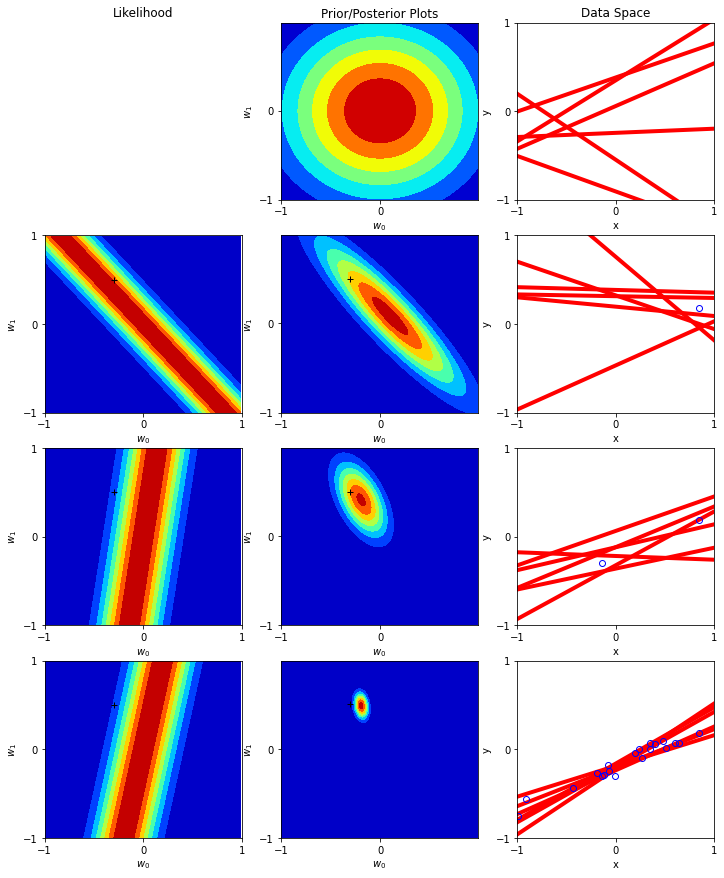

In [1]:
# Arthur Skok and Danny Hong
# Baynesian ML
# Project 2 
# 10/11/21

from numpy.core.fromnumeric import mean
import math
from scipy.stats import norm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

#Implement a basic linear regression and reproduce figures 3.7 and 3.8. You won't be able to reproduce them exactly since the draws of the observations are random, but it should be close.

#Figure 3.7:
#Sequential Bayesian learning for a simple linear model:
#True parameter values as used on page 154:
a0 = -0.3
a1 = 0.5

#Precision parameter
β = 25
α = 2

#Have 20 data points/observations: make random draws to generate it using normal/gaussian distribution:
N = 20
xn = np.random.uniform(-1, 1, N)

#Adding gaussian noise with standard deviation of 0.2 to obtain the target values tn.
#Our goal is to recover the values of a0 and a1 from such data, and we will explore the dependence on the size of the data set
noise = np.random.uniform(0, 0.2, N)

#Target(s) vector
tn = a0 + a1 * xn + noise
# setting up graph coordinates
X, Y = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1, 1, 0.01))

#Likelihood Graphs:

#plot of the likelihood function p(t|x, w) for the data point as a function of w
def likelihood_graph(index, ax):
  #hang the data off of points on the graph initially formed as vectors:
  w0, w1 = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1, 1, 0.01))
  #Using eq 1.60, β = 1/sig^2
  #mean is based off of y(x, w) = w0 + w1 * x
  mu = w0 + w1 * xn[index]
  g_dist = norm.pdf(mu, scale = math.sqrt(1/β))
  ax.plot(a0, a1, '+', color='black')
  ax.contourf(w0, w1, g_dist, cmap = 'jet')

#p(t|x, w, β) = N (t|y(x, w), β−1) (3.80)
#For comparison, the true parameter values a0 = −0.3 and a1 = 0.5 used to generate the data set
#are shown by a white cross in the plots in the left column of Figure 3.7

#Prior/Posterior Graphs

#def posterior_graph()
#generated directly using equation (3.49)
#for a regression model, the matrix you multiply the 
#The matrix of data has dimension n-by-p, where n is the number of samples observed, and p is the number of variables (features) measured in all samples
P = 2
setup_matrix = np.zeros((N, P))
setup_matrix[:, 0] = 1
setup_matrix[:, 1] = xn[:]
I = np.eye(P)

#Specifically, we consider a zero-mean
#isotropic Gaussian governed by a single precision parameter α so that
#and the corresponding posterior distribution over w is then given by (3.49) with
#mN = βSN ΦTt (3.53)
#S−1N = αI + βΦTΦ. (3.54)
def plot_posterior(tn, setup_matrix, ax):
    #usually inversing can be worked around in a better fashion...
    sN_inv = α * I + β * np.matmul(np.transpose(setup_matrix), setup_matrix) #(3.54)
    mN = β * np.matmul(np.matmul(np.linalg.inv(sN_inv), np.transpose(setup_matrix)), np.transpose(tn)) #(3.53)
    post_val = multivariate_normal(mN, np.linalg.inv(sN_inv)) #(3.49)
    ax.plot(a0, a1, '+', color = 'black')
    ax.contourf(X, Y, post_val.pdf(z), cmap = 'jet')
    
    #mN and sN should be used to calculate the next posterior
    return post_val, mN, np.linalg.inv(sN_inv)
#https://stackoverflow.com/questions/32455162/how-to-plot-contourf-colorbar-in-different-subplot-matplotlib 

#Data Space
#Samples of the regression function y(x, w) obtained by drawing samples of w from this
#posterior distribution are shown in the right-hand plot. Note that these sample lines
#all pass close to the data point.
def data_space(tn, xn, ax, mean, cov, index):
  weights = np.random.multivariate_normal(mean, cov, 6)
  x_ax_values = np.linspace(-1, 1)
    #creating lines with a slope of weight #1
  for i in range(6): 
    y = weights[i, 0] + weights[i, 1] * x_ax_values
    ax.plot(x_ax_values, y, color = 'red', linewidth = 4)

# The first row of this figure corresponds to the situation before any data points are observed and shows a
# plot of the prior distribution in w space together with six samples of the function
# y(x, w) in which the values of w are drawn from the prior.

# Formatting and Plotting
fig, ax = plt.subplots(4, 3)
fig.set_figheight(15)
fig.set_figwidth(12)

for subplot in ax[:, 0]:
    subplot.set_xlabel("$w_0$")
    subplot.set_ylabel("$w_1$")
    subplot.set_xlim(-1,1)
    subplot.set_ylim(-1,1)
    subplot.set_xticks([-1, 0, 1])
    subplot.set_yticks([-1, 0, 1])
for subplot in ax[:, 1]:
    subplot.set_xlabel("$w_0$")
    subplot.set_ylabel("$w_1$")
    subplot.set_xticks([-1, 0, 1])
    subplot.set_yticks([-1, 0, 1])
for subplot in ax[:, 2]:
    subplot.set_xlabel("x")
    subplot.set_ylabel("y")
    subplot.set_xlim(-1,1)
    subplot.set_ylim(-1,1)
    subplot.set_xticks([-1, 0, 1])
    subplot.set_yticks([-1, 0, 1])

#Arriving at the first plot for the prior, Sue from last year was very helpful 
X, Y = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1, 1, 0.01))
z = np.dstack([X,Y])
init_M = np.zeros(P) 
init_S = 1/α * I
init_prior = multivariate_normal(init_M, init_S)
ax[0, 1].contourf(X, Y, init_prior.pdf(z), cmap = 'jet')

ax[0, 0].axis('off')
ax[0, 0].set_title('Likelihood')
ax[0, 1].set_title('Prior/Posterior Plots')
ax[0, 2].set_title('Data Space')

likelihood_graph(0, ax[1,0])
likelihood_graph(1, ax[2,0])
likelihood_graph(2, ax[3,0])

posterior1, mN1, sN1  = plot_posterior(tn[:1], setup_matrix[:1, :], ax[1,1])
posterior2, mN2, sN2 = plot_posterior(tn[:2], setup_matrix[:2, :], ax[2, 1])
posterior20, mN3, sN3 = plot_posterior(tn, setup_matrix[:20, :], ax[3, 1])

data_space(0, 0, ax[0,2], init_M, init_S, False)
data_space(xn[:1], tn[:1], ax[1,2], mN1, sN1, True)
data_space(xn[:2], tn[:2], ax[2,2], mN2, sN2, True)
data_space(xn, tn, ax[3,2], mN3, sN3, True)

ax[1,2].plot(xn[:1], tn[:1], color='blue', marker = 'o', markeredgecolor="b", markerfacecolor='None', linestyle="None")
ax[2,2].plot(xn[:2], tn[:2], color='blue', marker = 'o', markeredgecolor="b", markerfacecolor='None', linestyle="None")
ax[3,2].plot(xn, tn, color='blue', marker = 'o', markeredgecolor="b", markerfacecolor='None', linestyle="None")

#The figures depict the increasing convergence of the posterior plots on the true parameter values, expressing the accuracy gained
#over trials with more observations through baynesian learning models. While the likelihood multiplied by the prior should give the
#next posterior plot (though this is not how it was calculated), the posteriors being calculated using the previous trials resulting
#mean and variance indeed visually resulted in graphs that appear as if the likelihood and prior plot were multiplied together.

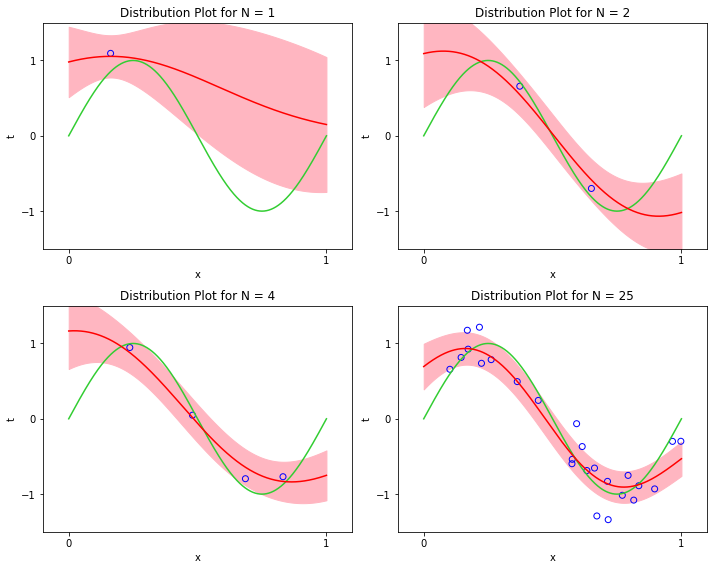

In [2]:
#Figure 3.8

import matplotlib.pyplot as plt
import numpy as np

#Declaring the precision parameters: alpha and beta
β = 25
α = 2 

I = np.eye(9) #Taking a 9 x 9 identity matrix since there are 9 Gaussian basis functions.
N_list = [1, 2, 4, 25] #List containing the four observation counts
sigma = 0.3 #The scaling parameter, sigma, which is set to 0.3
mu_list = np.linspace(-1, 1, 9) #List of Gaussian means from -1 to 1

#Setting up the figure for plotting later
figure = plt.figure(figsize = [10, 8])

#Function looping through all the four observation counts
for i in range(len(N_list)):
  x = np.random.uniform(0, 1, N_list[i]) #Drawing the N samples from a uniform distribution

  #Creating a sine function with the N samples as inputs and then adding Gaussian Noise to the function
  noise = np.random.normal(0, np.sqrt(1/β), N_list[i])
  t = np.sin(2 * np.pi * x) + noise
  
  #Creating the first design matrix, phi
  phi = np.zeros((N_list[i], 9)) 

  #Looping through the samples, then for each sample, calculate the nine phi values for all nine Gaussian basis functions.
  for j in range(N_list[i]): 
    for m in range(9):
      phi[j, m] = np.exp(-(x[j] - mu_list[m])**2/(2*(sigma)**2)) #this formula is the e component of the Gaussian pdf formula.

  sN = np.linalg.inv(α * I + β * np.matmul(phi.T, phi)) #Using Eqn. 3.53 to get the standard deviation of the posterior distribution
  mN = β * np.matmul(np.matmul(sN, phi.T), t.T) #Using Eqn. 3.54 to get the mean of the posterior distribution

  phi_values = np.zeros(9) #Setting up the array phi_values to store the updated phi values later.
  x_axis = np.linspace(0, 1, 1000) #Creating the x values that will used as inputs for getting the phi values and later for plotting.

  #Setting up the mean and standard deviation arrays
  mean = np.zeros(1000)
  std_dev = np.zeros(1000)

  #This calculates the phi_values at each point for plotting, then uses them to update
  #the corresponding mean and standard deviation values. 
  for k in range(1000):
    for l in range(9): 
      phi_values[l] = np.exp(-(x_axis[k] - mu_list[l])**2/(2*(sigma)**2)) 
    std_dev[k] = np.sqrt((1/β) + np.matmul(np.matmul(phi_values, sN), phi_values.T)) #Using Eqn. 3.59 to help find the standard deviation.
    mean[k] = np.matmul(mN, phi_values.T) 
  
  #Taking the respective sum and difference of the mean and the standard deviation
  sum = mean + std_dev
  diff = mean - std_dev

  x1 = np.linspace(0, 1, 1000) #Creating a set of x values that will be used as inputs to a sine function without additive Gaussian noise.
  y1 = np.sin(2 * np.pi * x1) #Creating a sine function without additive Gaussian noise.

  #Plotting the four predictive distribution subplots
  axes = plt.subplot(2, 2, i + 1)
  axes.set_xlabel('x')
  axes.set_ylabel('t')
  axes.set_xlim(-0.1, 1.1)
  axes.set_ylim(-1.5, 1.5)
  axes.set_xticks([0, 1])
  axes.set_yticks([-1, 0, 1])
  axes.plot(x1, y1, color = 'limegreen')
  axes.plot(x_axis, mean, 'red')
  axes.fill_between(x_axis, sum, diff, color = 'lightpink')
  plt.scatter(x, t, facecolors = 'none', edgecolors = 'blue')
  plt.title(f'Distribution Plot for N = {N_list[i]}') 
  plt.tight_layout(pad = 1)

plt.show()

#In summary, the process used in replicating the figures from 3.8 involve first drawing observations from 0 to 1 from an uniform distribution. 
#The target variables will then be created by inputting the samples into a sine curve and then adding Gaussian noise.
#Later, the data, a sine curve without Gaussian noise, and the mean and standard deviation of the predictive distribution
#are plotted on each subplot. The results show two things. First, as N, the number of observations, increases the standard deviation decreases 
#and the mean converges to the true mean. Additionally, it's also noticed that the standard deviation is generally lower around the data points.

In [4]:
##Stretch Goal: Implementing the evidence approximation using Eqns. 3.92 and 3.95 in order to estimate alpha and beta.
import numpy as np

#Setting up the initial estimates for alpha and beta
α = 1
β = 20

#Declaring a 2 x 2 identity matrix to be used later in calculations
I1 = np.eye(2)

#Obtaining the eigenvalues and eigenvectors of the design matrix from part 1
λ_values, λ_vectors = np.linalg.eig(np.matmul(setup_matrix.T, setup_matrix))

#Applying the approximation equations for 100 iterations
for i in range(100):
  A = (α * I1) + (β * np.matmul(setup_matrix.T, setup_matrix)) #Eqn. 3.81 for finding A
  mN1 = β * np.matmul(np.matmul(np.linalg.inv(A), setup_matrix.T), tn.T) #Eqn. 3.84 for finding mN
  λ_values = λ_values * β #Updating the eigenvalues

  γ = 0 #Setting up the gamma value

  #Iterating through each eigenvalue
  for λ in λ_values: 
    γ = γ + (λ/(α + λ)) #Applying Eqn. 3.91 to obtain gamma 
  α = γ/(np.matmul(mN1.T, mN1)) #Applying Eqn. 3.92 to obtain the alpha estimate 
 
  summation = 0 #Setting up the summation count
  difference = 0 #Setting up the difference count

  #Iterating through the 20 data points/observations declared in part 1
  for j in range(N):
  #Applying Eqn. 3.95 to obtain the beta estimate
    summation = summation + (tn[j] - np.matmul(mN1, setup_matrix[j, :]))**2
    difference =  difference + (summation * 1/(N - γ))
  β = 1/difference

#Printing out the estimated values for alpha and beta
print("α Estimate = ", α)
print("β Estimate = ", β)

α Estimate =  7.960384668059236
β Estimate =  29.170809037513518
